<a href="https://colab.research.google.com/github/staceyland/crypto_trading/blob/main/Crypto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

I just started a new cryptocurrency trading plan over the summer. This is a moving average strategy that I started over the summer to collect small gains in the market. Each trade is a long and I won't close the trade (sell) until I have reached at least 1% profitability. These are the trades I used to test the strategy. The data set I have uploaded are the the crypto trades I took since June.

In [79]:
Crypto_raw = pd.read_csv('/content/crypto-8-30.csv', parse_dates=['Sell_date'])

Let's eliminate all rows with missing data.

In [136]:
Crypto1 = Crypto_raw.dropna()

I'll clean up the data by removing the dollar amounts and other unneccesary or sensitive information.

In [137]:
Crypto = Crypto1.drop(['Date of purchase UTC', 'Date of sale UTC', 'Market1', 'Amount', 'Buy order rate', 'Sell order rate', 'Profit'], axis=1)

Let's take a look at the clean data. We have the markets traded, the date and times I entered and exited the trades, and the total profit earned (by percentage).

In [138]:
Crypto.head()

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage
0,6/5/2021,1:05:01 PM,2021-06-10,4:12:56 AM,BTC,3.57
1,6/5/2021,3:03:56 PM,2021-06-07,12:00:12 PM,ADA,3.10
2,6/5/2021,3:39:57 PM,2021-08-11,5:40:17 AM,ADA,3.34
3,6/10/2021,6:14:45 AM,2021-08-11,5:44:49 AM,ADA,10.97
4,6/15/2021,6:29:15 PM,2021-08-01,8:05:24 PM,ETH,2.43


After cleaning there were 306 trades logged.

In [139]:
Crypto.shape[0]

306

What is the average profit percentage per trade?

In [140]:
Crypto['Profit percentage'].mean()

3.9813071895424836

So on average I profited almost 4% per trade.

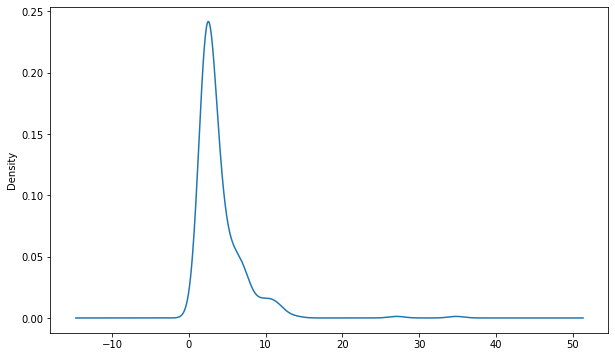

In [67]:
Crypto['Profit percentage'].plot(kind='kde', figsize=(10,6))

As we can see, most trades profited around 1%. There were several outliers above this percentage.

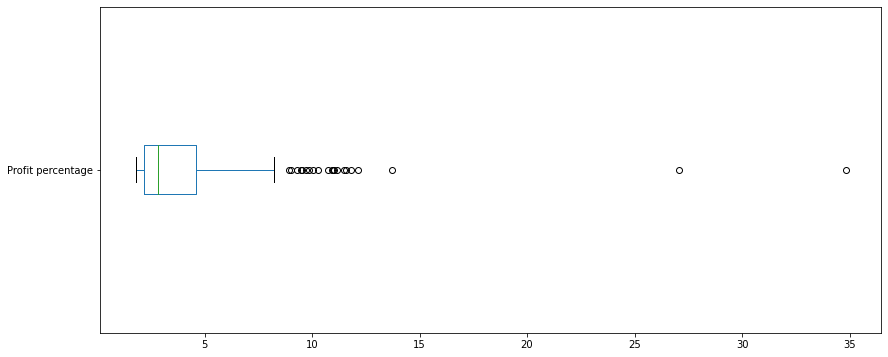

In [141]:
Crypto['Profit percentage'].plot(kind='box', vert=False, figsize=(14,6))

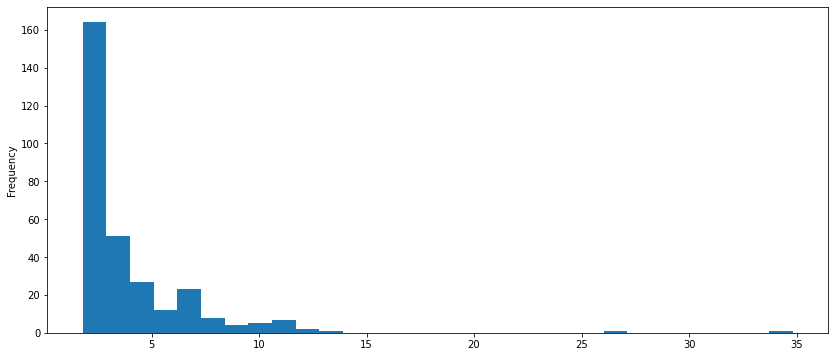

In [69]:
Crypto['Profit percentage'].plot(kind='hist', bins=30, figsize=(14,6))

We can see that most of the trades were in the Etherium market. Helium received the least amount of trades.

In [142]:
Crypto['Market'].value_counts()

ETH     101
BNB      94
BTC      43
ADA      28
XRP      24
DOGE     15
HNT       1
Name: Market, dtype: int64

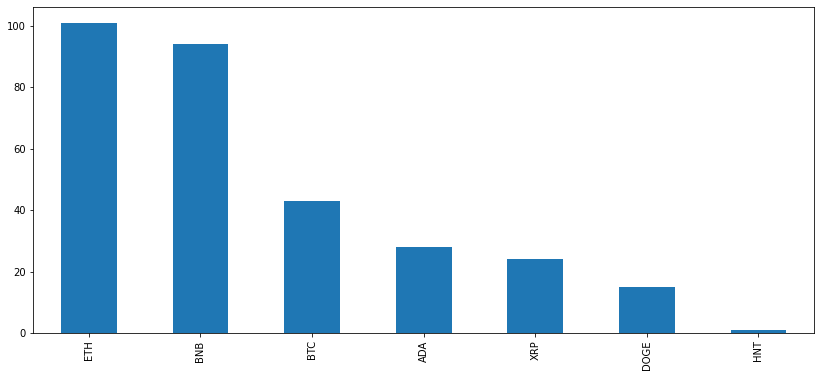

In [143]:
Crypto['Market'].value_counts().plot(kind='bar', figsize=(14,6))

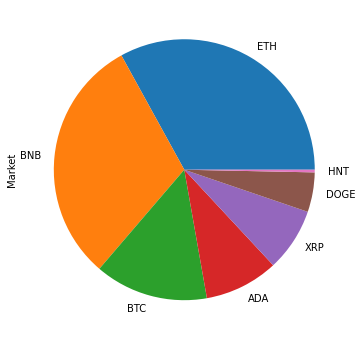

In [144]:
Crypto['Market'].value_counts().plot(kind='pie', figsize=(6,6))


Dogecoin had the most profitable trades.

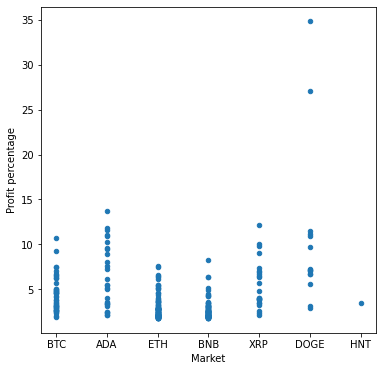

In [145]:
Crypto.plot(kind='scatter', x='Market', y='Profit percentage', figsize=(6,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


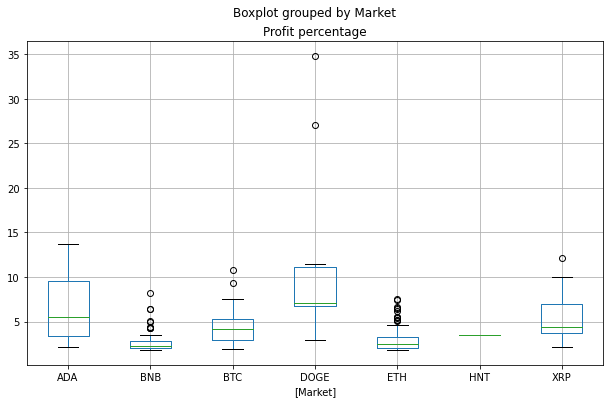

In [146]:
Crypto[['Profit percentage', 'Market']].boxplot(by='Market', figsize=(10,6))

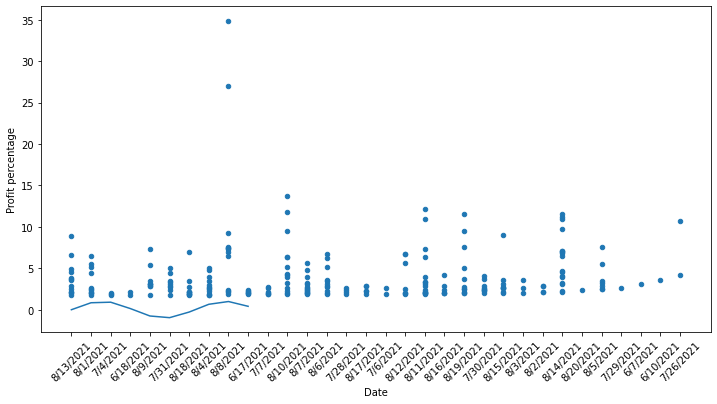

In [ ]:
Crypto.plot(kind='scatter', x='Sell_Date', y='Profit percentage', figsize=(12,6))
x = np.arange(0, 10, 1)
y = np.sin(x)
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.show()

What was the HNT trade?


In [129]:
Crypto.loc[(Crypto['Market'] == 'HNT')]

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage,Trade_duration
298,2021-08-26,4:49:26 AM,2021-08-27,10:43:35 PM,HNT,3.51,1


How many trades were BNB or DOGE?

In [125]:
Crypto.loc[(Crypto['Market'] == 'BNB') | (Crypto['Market'] == 'DOGE')].shape[0]

112

How many Etherium trades were completed each day?

In [85]:
ETH_trades = Crypto.loc[Crypto['Market'] == 'ETH', 'Sell_date'].value_counts()

ETH_trades

2021-08-01    7
2021-08-13    6
2021-08-06    6
2021-07-30    6
2021-08-04    6
2021-08-08    5
2021-08-15    4
2021-08-27    4
2021-08-05    4
2021-08-07    4
2021-06-17    3
2021-08-09    3
2021-08-11    3
2021-08-02    3
2021-08-10    3
2021-07-31    3
2021-08-19    3
2021-08-20    3
2021-08-16    2
2021-07-28    2
2021-07-07    2
2021-08-12    2
2021-07-04    2
2021-08-23    2
2021-08-18    2
2021-08-25    2
2021-08-03    2
2021-08-17    2
2021-08-28    1
2021-08-21    1
2021-06-18    1
2021-08-29    1
2021-08-24    1
Name: Sell_date, dtype: int64

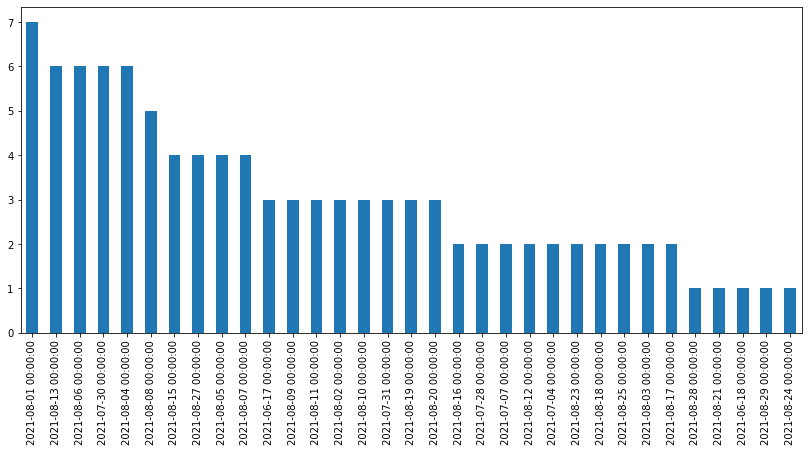

In [113]:
ETH_trades.plot(kind='bar', figsize=(14,6))

Which trade had the highest profit percentage? 

In [123]:
cond = Crypto['Profit percentage'] == Crypto['Profit percentage'].max()

Crypto.loc[cond]

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage,Trade_duration
59,2021-07-28,1:15:17 PM,2021-08-08,12:56:24 AM,DOGE,34.83,11


Which trade had the lowest profit percentage?

In [94]:
cond = Crypto['Profit percentage'] == Crypto['Profit percentage'].min()

Crypto.loc[cond]

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage
295,8/25/2021,12:49:36 PM,2021-08-25,5:16:30 PM,ETH,1.8


Let's see how much time it takes to complete a trade. I'll create a column to calculate the duration of each trade.

In [148]:
Crypto[['Purchase_date','Sell_date']] = Crypto[['Purchase_date','Sell_date']].apply(pd.to_datetime) #if conversion required
Crypto['Trade_duration'] = (Crypto['Sell_date'] - Crypto['Purchase_date']).dt.days

Let's see the new column.

In [149]:
Crypto.head()

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage,Trade_duration
0,2021-06-05,1:05:01 PM,2021-06-10,4:12:56 AM,BTC,3.57,5
1,2021-06-05,3:03:56 PM,2021-06-07,12:00:12 PM,ADA,3.10,2
2,2021-06-05,3:39:57 PM,2021-08-11,5:40:17 AM,ADA,3.34,67
3,2021-06-10,6:14:45 AM,2021-08-11,5:44:49 AM,ADA,10.97,62
4,2021-06-15,6:29:15 PM,2021-08-01,8:05:24 PM,ETH,2.43,47


What is the average number of days I held a trade?

In [150]:
Crypto['Trade_duration'].mean()

6.53921568627451

So, on average I spend over 6 days in a trade to make an average 4% profit.

What is the shortest time I spent in a trade (days)?

In [151]:
Crypto['Trade_duration'].min()

0

This tells me there are trades that I entered and exited in the same day. How may trades were there and what were the trades?

In [152]:
cond = Crypto['Trade_duration'] == Crypto['Trade_duration'].min()

Crypto.loc[cond]

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage,Trade_duration
36,2021-06-17,5:34:44 PM,2021-06-17,11:20:28 PM,ETH,2.28,0
40,2021-06-18,10:25:43 AM,2021-06-18,11:05:05 AM,ETH,2.08,0
42,2021-07-04,8:32:14 AM,2021-07-04,6:27:47 PM,BNB,1.86,0
47,2021-07-07,2:01:50 AM,2021-07-07,4:45:30 AM,ETH,2.73,0
48,2021-07-07,4:12:03 AM,2021-07-07,6:25:14 AM,BNB,2.07,0
...,...,...,...,...,...,...,...
301,2021-08-26,8:40:48 AM,2021-08-26,1:46:05 PM,BNB,2.15,0
309,2021-08-27,12:48:33 AM,2021-08-27,2:55:25 AM,BNB,2.49,0
310,2021-08-27,3:58:18 AM,2021-08-27,11:24:55 AM,BNB,2.17,0
311,2021-08-27,4:51:06 AM,2021-08-27,3:37:06 PM,XRP,6.71,0


It looks like there were 86 trades that were completed in less than a day. What's the most amount of time I spent in a trade?

In [153]:
Crypto['Trade_duration'].max()

67

In [154]:
cond = Crypto['Trade_duration'] == Crypto['Trade_duration'].max()

Crypto.loc[cond]

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage,Trade_duration
2,2021-06-05,3:39:57 PM,2021-08-11,5:40:17 AM,ADA,3.34,67


I spent 67 days in a ADA trade. Wow! The market took a downturn and I had to HODL!

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


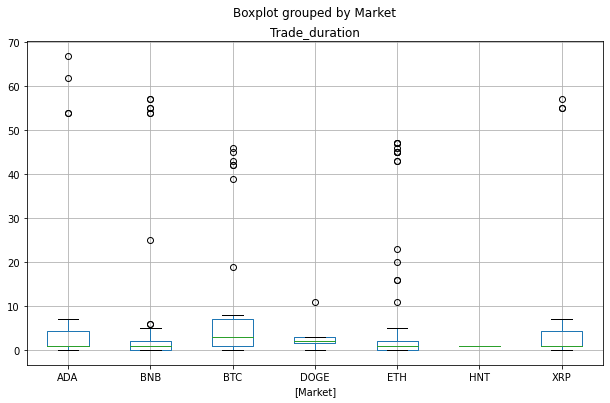

In [155]:
Crypto[['Trade_duration', 'Market']].boxplot(by='Market', figsize=(10,6))

Which markets give faster turnarounds? Looks like DOGE not only gave me my most profitable trade, but I have to stay in trades for less time.

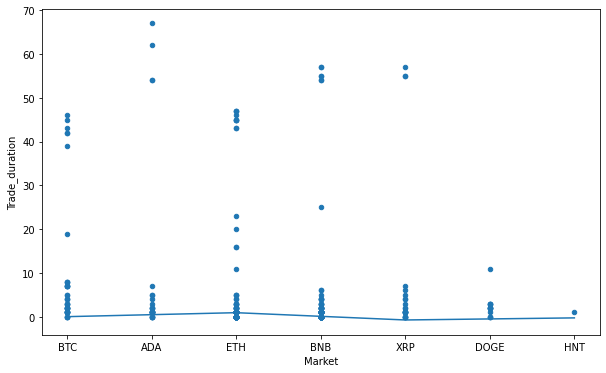

In [156]:
Crypto.plot(kind='scatter', x='Market', y='Trade_duration', figsize=(10,6))
x = np.arange(0, 8, 2)
y = np.sin(x)
plt.plot(x, y)

plt.show()

What were my DOGE trades?

In [157]:
Crypto.loc[(Crypto['Market'] == 'DOGE')]

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage,Trade_duration
59,2021-07-28,1:15:17 PM,2021-08-08,12:56:24 AM,DOGE,34.83,11
127,2021-08-07,5:55:42 AM,2021-08-08,12:58:28 AM,DOGE,27.06,1
143,2021-08-09,1:18:50 AM,2021-08-09,1:52:04 PM,DOGE,7.27,0
147,2021-08-09,8:40:47 AM,2021-08-09,1:52:59 PM,DOGE,3.16,0
148,2021-08-09,8:54:58 AM,2021-08-09,1:53:13 PM,DOGE,2.90,0
149,2021-08-09,12:30:11 PM,2021-08-12,5:26:22 AM,DOGE,6.68,3
157,2021-08-10,7:36:11 AM,2021-08-12,5:27:00 AM,DOGE,6.73,2
159,2021-08-10,12:37:46 PM,2021-08-12,5:27:46 AM,DOGE,5.63,2
167,2021-08-11,12:09:03 PM,2021-08-14,7:49:56 AM,DOGE,9.71,3
168,2021-08-11,12:09:36 PM,2021-08-14,7:50:29 AM,DOGE,11.50,3


What were my ADA trades?

In [158]:
Crypto.loc[(Crypto['Market'] == 'ADA')]

,Purchase_date,Purchase_time,Sell_date,Sell_time,Market,Profit percentage,Trade_duration
1,2021-06-05,3:03:56 PM,2021-06-07,12:00:12 PM,ADA,3.10,2
2,2021-06-05,3:39:57 PM,2021-08-11,5:40:17 AM,ADA,3.34,67
3,2021-06-10,6:14:45 AM,2021-08-11,5:44:49 AM,ADA,10.97,62
22,2021-06-16,5:19:28 PM,2021-06-17,4:21:20 AM,ADA,2.32,1
27,2021-06-17,6:40:09 AM,2021-08-10,10:25:31 PM,ADA,9.54,54
32,2021-06-17,1:14:39 PM,2021-08-10,10:25:36 PM,ADA,11.83,54
74,2021-08-01,8:17:31 AM,2021-08-08,12:48:51 AM,ADA,7.30,7
91,2021-08-03,1:27:32 AM,2021-08-03,2:49:19 PM,ADA,3.61,0
153,2021-08-10,5:11:14 AM,2021-08-10,10:29:57 PM,ADA,13.71,0
173,2021-08-11,4:18:51 PM,2021-08-13,12:00:49 PM,ADA,8.94,2


Overall this exercise has given me good insights on my new trading plan. I can consider adding more DOGE trades to increase my profitability and decrease how long I have to hold a trade. Most of my trades are ETH and they tend to be the least profitable. I hold ADA trades the longest. Now I can make some changes and re-evaluate my trading strategy. Happy trading!!

In [160]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://www.upslide.net/wp-content/uploads/2016/06/Clustered-Column-Curbe.gif')